# Auswirkung von colsample_bytree auf XGB-Modell

#### Importe

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import r2_score as r2
from sklearn.metrics import max_error
import seaborn as sns

#### Laden des Train und Testloss über den Trainingsverlauf

In [2]:
# Standardisierungsdaten
loss_data_file_1 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_011_006.npz'
loss_data_1 = np.load(loss_data_file_1)
loss_data_file_2 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_011_009.npz'
loss_data_2 = np.load(loss_data_file_2)
loss_data_file_3 = Path.cwd().parent / 'data' / 'models' / 'hyperparams' / 'loss_011_011.npz'
loss_data_3 = np.load(loss_data_file_3)

train_loss_1 = np.array(loss_data_1['train_loss'])
test_loss_1 = np.array(loss_data_1['test_loss'])
train_loss_2 = np.array(loss_data_2['train_loss'])
test_loss_2 = np.array(loss_data_2['test_loss'])
train_loss_3 = np.array(loss_data_3['train_loss'])
test_loss_3 = np.array(loss_data_3['test_loss'])

#### Importing Plot Stylesheet

In [3]:
plt.style.use(['seaborn-v0_8-paper',Path.cwd().parent / 'plotstyle' / 'paper.mplstyle'])
cm = 1/2.54

#### Plot loss vs epoch

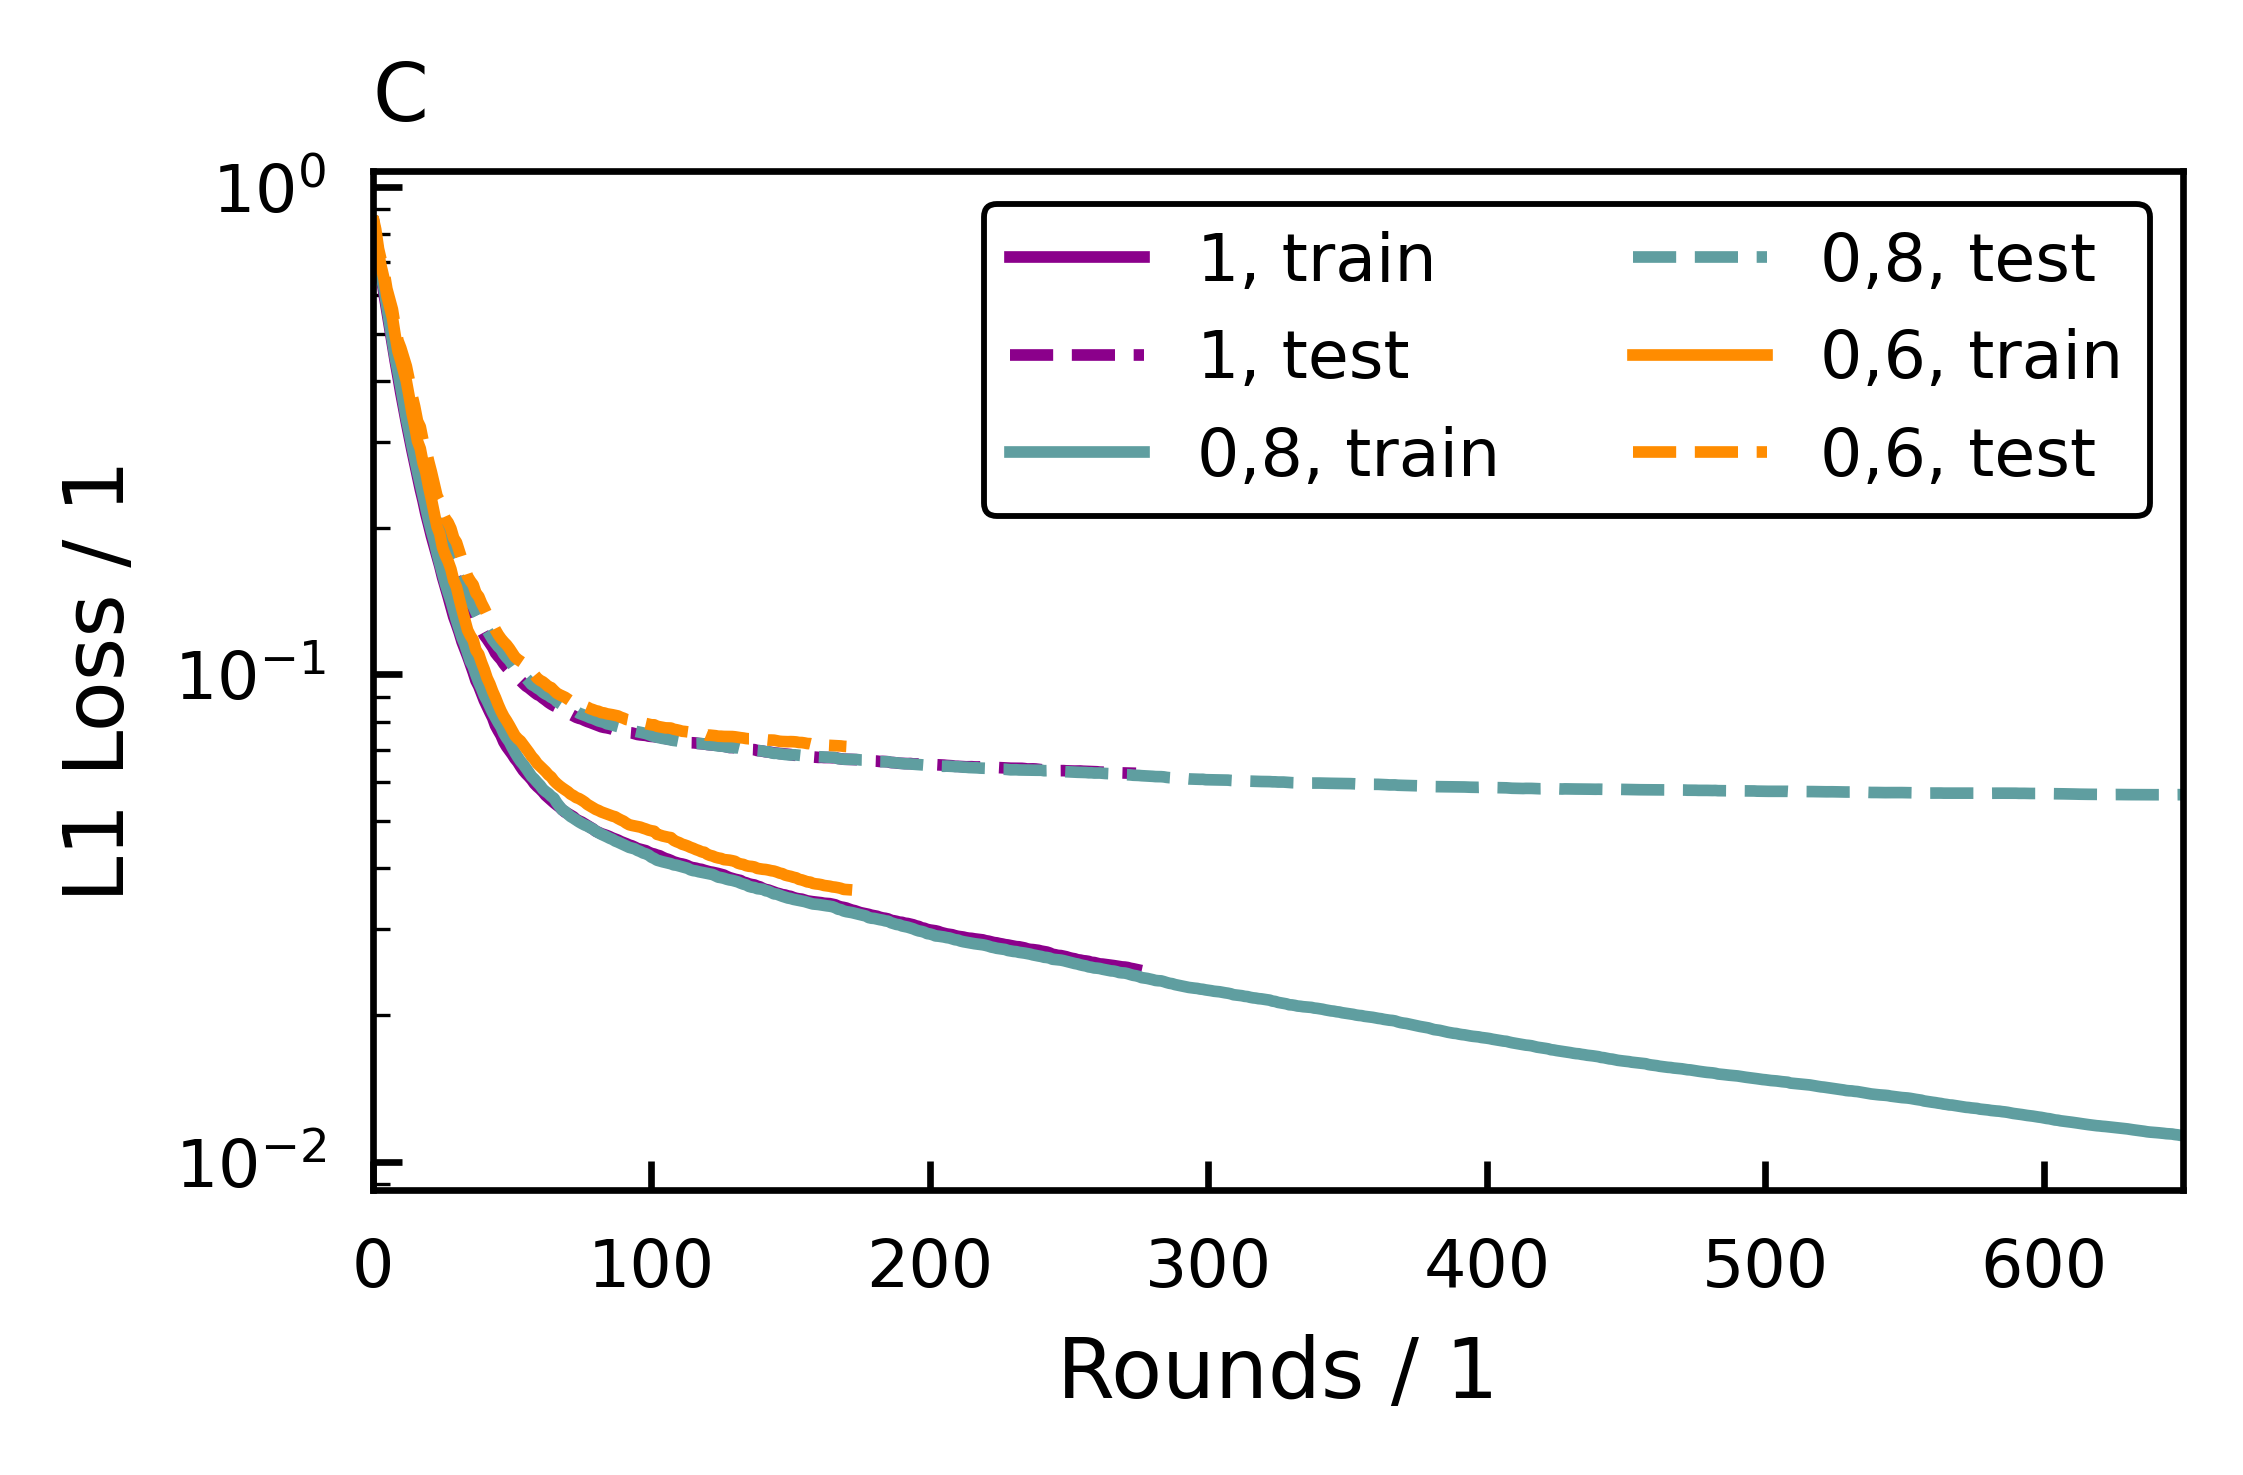

In [10]:
fig,ax = plt.subplots(figsize=(9.75*cm, 6.5*cm))

ax.semilogy(train_loss_1, '-', color = 'darkmagenta', label='1, train')
ax.semilogy(test_loss_1, '--', color = 'darkmagenta', label='1, test')
ax.semilogy(train_loss_2, '-', color = 'cadetblue', label='0,8, train')
ax.semilogy(test_loss_2, '--', color = 'cadetblue', label='0,8, test')
ax.semilogy(train_loss_3, '-', color = 'darkorange', label='0,6, train')
ax.semilogy(test_loss_3, '--', color = 'darkorange', label='0,6, test')

#plt.title("Train and Test Loss")
ax.set(xlabel = 'Rounds / 1', ylabel = 'L1 Loss / 1') #Beschriftung Achsen; Kursiv durch $$; Index durch _{}
ax.set(xlim=(0,650))
ax.tick_params(direction = 'in') #, length = 20, width = 3)
ax.set_title('C', loc='left')

plt.legend(ncol = 2)
plt.tight_layout()
plt.show()

In [11]:
#fig.savefig(Path.cwd().parent / 'plots/xgb/TKA_SRA_PB_0018_colsample_bytree.png', bbox_inches = 'tight')